In [6]:
import zipfile
zipref=zipfile.ZipFile(R'C:\Users\dell\Desktop\ml\campusx_dl_2\54_non_linear\archive.zip','r')
zipref.extractall('/campusx_dl_2/54_non_linear')
zipref.close()


In [4]:
import os
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [7]:
folder_path='/campusx_dl_2/54_non_linear/utkface_aligned_cropped/UTKFace'

In [8]:
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
	age.append(int(file.split('_')[0]))
	gender.append(int(file.split('_')[1]))
	img_path.append(file)

In [9]:
len(age)

23708

In [12]:
df=pd.DataFrame({'age':age,'gender':gender,'img':img_path})

In [13]:
df.head()

,age,gender,img
0,100,0,100_0_0_20170112213500903.jpg.chip.jpg
1,100,0,100_0_0_20170112215240346.jpg.chip.jpg
2,100,1,100_1_0_20170110183726390.jpg.chip.jpg
3,100,1,100_1_0_20170112213001988.jpg.chip.jpg
4,100,1,100_1_0_20170112213303693.jpg.chip.jpg


In [15]:
test=df.iloc[20000:]
train=df.iloc[:20000]

In [16]:
train.shape,test.shape

((20000, 3), (3708, 3))

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,
								 rotation_range=30,
								 width_shift_range=0.2,
								 height_shift_range=0.2,
								 zoom_range=0.2,
								 shear_range=0.2,
								 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [18]:
train_generator=train_datagen.flow_from_dataframe(train,
												  directory=folder_path,
												  x_col='img',
												  y_col=['age','gender'],
												  target_size=(200,200),
												  class_mode='multi_output')
test_generator=train_datagen.flow_from_dataframe(test,
												  directory=folder_path,
												  x_col='img',
												  y_col=['age','gender'],
												  target_size=(200,200),
												  class_mode='multi_output')


Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [19]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

In [20]:
vggnet=VGG16(include_top=False,input_shape=(200,200,3))

In [26]:
vggnet.trainable=False
output=vggnet.layers[-1].output
flatten=Flatten()(output)
dense1=Dense(512,activation='relu')(flatten)
dense2=Dense(512,activation='relu')(flatten)

dense3=Dense(512,activation='relu')(dense1)
dense4=Dense(512,activation='relu')(dense2)

output1=Dense(1,activation='linear',name='age')(dense3)
output2=Dense(2,activation='sigmoid',name='gender')(dense4)

In [27]:
model=Model(inputs=vggnet.input,outputs=[output1,output2])

In [28]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 200, 200, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 200, 200, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

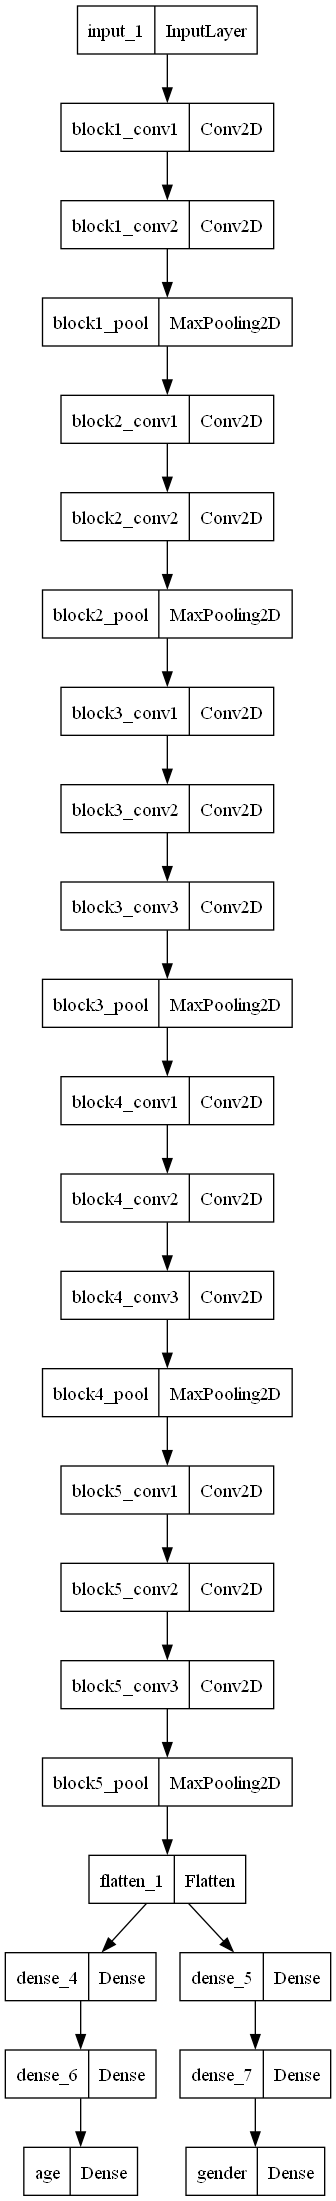

In [29]:
from keras.utils import plot_model
plot_model(model,to_file='age_gen.png')